In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d paramaggarwal/fashion-product-images-small

fashion-product-images-small.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
import zipfile
zip_ref=zipfile.ZipFile('/content/fashion-product-images-small.zip')
zip_ref.extractall()
zip_ref.close()

In [5]:
from keras.preprocessing import image
from keras.applications.resnet_v2 import ResNet101V2
import numpy as np
import tqdm

In [6]:
import os,random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras
import numpy

In [7]:
base_model=ResNet101V2(include_top=False)
base_model.trainable=False
model=keras.Sequential([
    base_model,
    keras.layers.GlobalAveragePooling2D()
])

In [8]:
def process(img_path,model):
  img=mpimg.imread(img_path)
  img=img/255
  img=np.resize(img,(224,224,3))
  img=np.expand_dims(img,axis=0)
  result = model.predict(img,verbose=0)
  return (tf.squeeze(result))

In [ ]:
features=[]
filenames=[]
for img in tqdm.tqdm(os.listdir('/content/images')):
  img_path="/content/images/"+img
  filenames.append(img_path)
  features.append(process(img_path,model))

In [11]:
from sklearn.neighbors import NearestNeighbors
neighbors=NearestNeighbors(n_neighbors=6,algorithm='brute',metric='euclidean')
neighbors.fit(features)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

In [92]:
img_path="/content/images/11316.jpg"

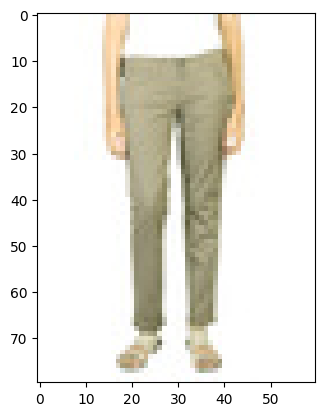

In [93]:
img=mpimg.imread(img_path)
plt.imshow(img)

In [94]:
result=process(img_path,model)

In [95]:
dis,indices=neighbors.kneighbors([result])
indices

array([[21005, 22931, 12521, 10017, 26452, 18160]])

In [96]:
for index in indices[0]:
  print(filenames[index])

/content/images/11316.jpg
/content/images/27901.jpg
/content/images/39225.jpg
/content/images/48111.jpg
/content/images/18710.jpg
/content/images/39126.jpg


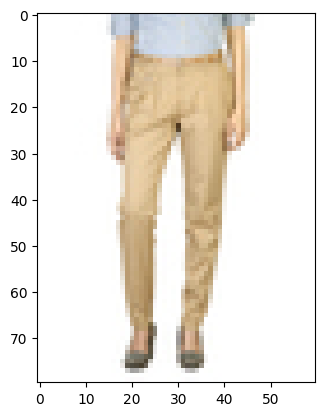

In [102]:
img='/content/images/27901.jpg'
img=mpimg.imread(img)
plt.imshow(img)

In [10]:
import pickle
with open('features.pkl', 'wb') as f:
    pickle.dump(features, f)
with open('filenames.pkl','wb')as f:
  pickle.dump(filenames,f)

In [64]:
model.save('fashion_features_extractor_model.h5')